In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Atger_PNAS_2015
Weger_CellMetab_2019
Zhang_PNAS_2014


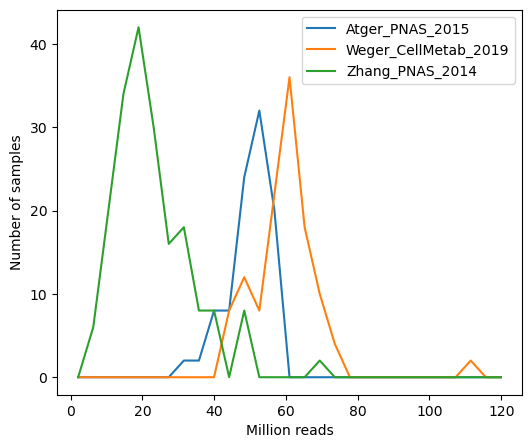

In [53]:
Datasets = ['Atger_PNAS_2015','Weger_CellMetab_2019','Zhang_PNAS_2014']


N_counts = {}

for dataset in Datasets:
    print(dataset)

    samples = f'../resources/{dataset}/file_list.txt'
    with open(samples) as f:
        samples = f.readlines()
    samples = ['_'.join(x.strip().split('/')[3].split('_')[:-1]) for x in samples]

    N_counts[dataset] = []
    for sample in samples:
        infile = f'../results/{dataset}/kallisto/{sample}/abundance.tsv'
        N_counts[dataset].append( pd.read_csv(infile, sep='\t',usecols=['est_counts']).values.sum().item() )




fig, ax = plt.subplots(1,1,figsize=(6,5))

n_max = 0
for dataset in Datasets:
    N_counts[dataset] = np.array(N_counts[dataset])
    n_max = max(n_max, N_counts[dataset].max())

bins = np.linspace(0,np.ceil(n_max/1e6)+10,30,endpoint=True)
for dataset in Datasets:
    [h,x] = np.histogram(N_counts[dataset]/1e6,bins=bins)
    x = (x[1:] + x[:-1])/2
    ax.plot(x,h,label=dataset)
ax.set_xlabel('Million reads')
ax.set_ylabel('Number of samples')
ax.legend()

fig.savefig('fig/hist_reads_per_sample.pdf')
